In [129]:
#importing all libraries needed
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            precision_recall_fscore_support, roc_curve, auc,
                            classification_report, confusion_matrix, roc_auc_score)
from sklearn.model_selection import GridSearchCV
import random
import warnings
import joblib

warnings.filterwarnings("ignore")

In [130]:
#Load the dataset
df = pd.read_csv('creditcard.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
df.shape

(284807, 31)

In [138]:
#Remove white space and perform some cleaning on the columns name
col_name = [col.strip().lower().replace(' ','_') for col in df.columns]

df.columns = col_name
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [139]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
#checking for duplicate datas
duplicates = df.duplicated()

num_duplicate = duplicates.sum()
print("The number of duplicate is: ", num_duplicate)

The number of duplicate is:  0


In [132]:
#drop all duplicate 
df = df.drop_duplicates()


In [133]:
duplicates = df.duplicated()

num_duplicate = duplicates.sum()
print("The number of duplicate is: ", num_duplicate)

The number of duplicate is:  0


In [141]:
#checking for missing values

df.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

In [142]:
# Remove NaN or infinite values from the 'amount' column
df = df[np.isfinite(df['amount']) & df['amount'].notna()]
df.head(20)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


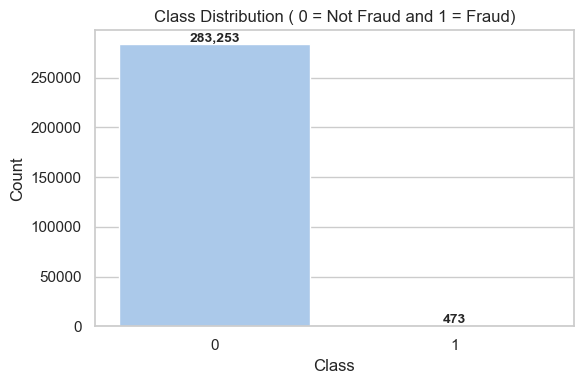

In [143]:
#checking the count of the class where 0 is not fraud and 1 is fraud

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='class', hue = 'class', data=df, palette='pastel', legend=False)
plt.title("Class Distribution ( 0 = Not Fraud and 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")


for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',              
                (p.get_x() + p.get_width() / 2, count), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
          

In [29]:
df_clean = df[np.isfinite(df['amount'])]

In [31]:
print("NaNs in 'amount':", df['amount'].isna().sum())
print("Infs in 'amount':", np.isinf(df['amount']).sum())

NaNs in 'amount': 0
Infs in 'amount': 0


In [32]:
print("NaNs in 'class':", df['class'].isna().sum())
print("Infs in 'class':", np.isinf(df['class']).sum())

NaNs in 'class': 0
Infs in 'class': 0


In [33]:
print("Min amount:", df['amount'].min())
print(df[df['amount'] <= 0])

Min amount: 0.0
            time        v1        v2        v3        v4        v5        v6  \
383        282.0 -0.356466  0.725418  1.971749  0.831343  0.369681 -0.107776   
514        380.0 -1.299837  0.881817  1.452842 -1.293698 -0.025105 -1.170103   
534        403.0  1.237413  0.512365  0.687746  1.693872 -0.236323 -0.650232   
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
575        430.0 -1.860258 -0.629859  0.966570  0.844632  0.759983 -1.481173   
...          ...       ...       ...       ...       ...       ...       ...   
283719  171817.0 -0.750414  0.904175  0.996461  0.427284  1.720336  0.929256   
283782  171870.0  2.083677 -0.065811 -1.442870  0.135416  0.043035 -1.306975   
283949  172027.0  2.132569 -0.057836 -1.724522 -0.030326  0.412146 -0.903088   
284085  172140.0 -2.210521 -1.039425  0.189704 -1.291932  3.742120 -1.665061   
284770  172759.0 -0.822731  1.270140 -0.138566  0.479620  1.242101  0.795218   

              v7       

In [37]:
df = df[(df['amount'] > 0) & df['class'].notna()]

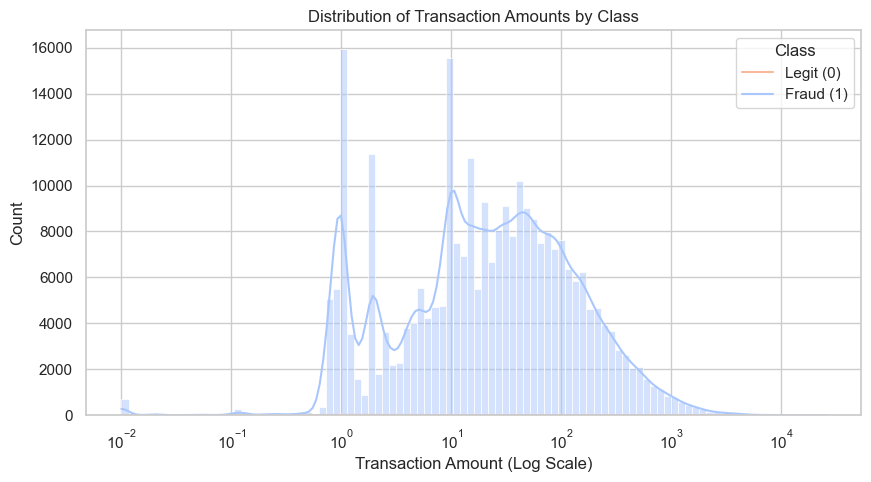

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df , x='amount', hue='class', bins=100, kde=True, palette='coolwarm', log_scale=(True, False))
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Legit (0)', 'Fraud (1)'])
plt.show()

In [48]:
#Transactions Over Time
# Create 'hour' column assuming time is in seconds
df.loc[:, 'hour'] = ((df['time'] // 3600) % 24)

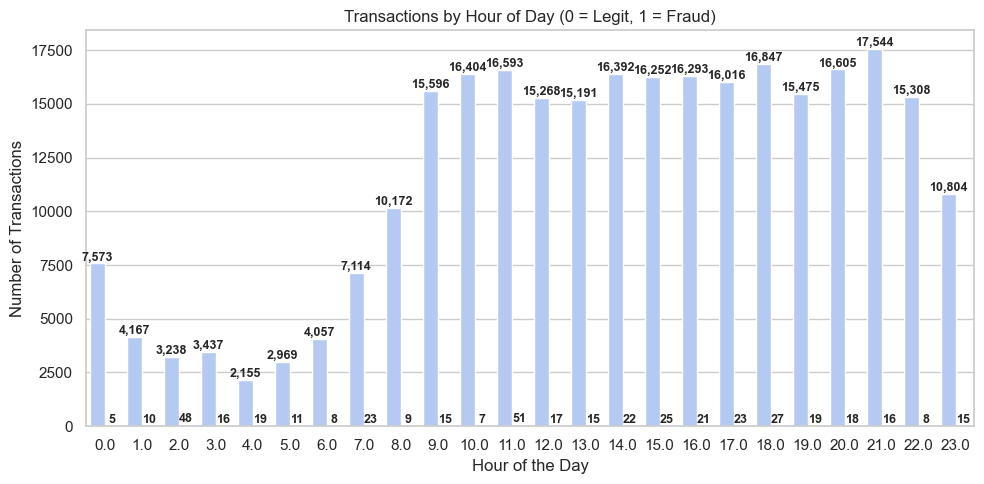

In [49]:
# Countplot of hour by class
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='hour', hue='class', data=df, palette='coolwarm', legend=False)
plt.title("Transactions by Hour of Day (0 = Legit, 1 = Fraud)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")

# Annotate each bar with count
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height()):,}',
                (bar.get_x() + bar.get_width()/2, bar.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

*************Exploratory Data Analysis (EDA)*************

In [51]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,hour
count,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,...,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000
mean,94848.257451,0.005451,-0.006128,-0.001772,-0.014810,-0.000395,-0.002416,0.004272,-0.000825,-0.000215,...,-0.001622,0.000333,0.000406,-0.000777,-0.001226,0.001971,0.000727,89.040081,0.001589,14.053934
std,47475.151212,1.946151,1.645882,1.506756,1.403327,1.375584,1.331261,1.224540,1.175911,1.095976,...,0.724438,0.622263,0.605776,0.521001,0.481761,0.395230,0.328299,251.100510,0.039832,5.833692
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.010000,0.000000,0.000000
25%,54256.000000,-0.915833,-0.604182,-0.893141,-0.854687,-0.691832,-0.769709,-0.550528,-0.209130,-0.643978,...,-0.544407,-0.161553,-0.354564,-0.318007,-0.327639,-0.070596,-0.052737,5.990000,0.000000,10.000000
50%,84711.000000,0.019099,0.061158,0.177650,-0.028750,-0.054456,-0.277622,0.042591,0.021030,-0.051958,...,0.004837,-0.011034,0.041019,0.015233,-0.054410,0.001464,0.011351,22.500000,0.000000,15.000000
75%,139339.750000,1.315803,0.799975,1.022694,0.728142,0.610767,0.392112,0.572012,0.324965,0.597560,...,0.526683,0.148103,0.440161,0.350264,0.238870,0.091491,0.078428,78.200000,0.000000,19.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,23.000000


In [53]:
df['class'].value_counts()

class
0    281470
1       448
Name: count, dtype: int64

In [56]:
#what to check the percentage of the fraud and non fraud case 
a = df[df['class'] == 1].shape[0]
b = df['class'].shape[0]
pos_class = a/b 
neg_class = 1 - pos_class

print(f'{100 * pos_class:.3f}%')
print(f'{100 * neg_class:.3f}%')

0.159%
99.841%


we can see from the above code that the case of fraud detection is 0.159% of the total transaction and the for non fraud case is 99.841% of the total transaction. This show that fraud cases are rere 

In [69]:
# Total Time
total_secs = df['time'].max()
total_minutes = total_secs/60
total_hours = total_minutes/60
total_days = round(total_hours/24)

total_transection = df.shape[0]
print(f"The dataset contain a total transection of {total_transection} within the span of {total_days} day")

The dataset contain a total transection of 281918 within the span of 2 day


In [72]:
loss = df[df['class'] == 1]['amount'].sum()
print(f"Due to the fraud case the bank losses a total amount of ${loss} in two days")

Due to the fraud case the bank losses a total amount of $58591.39 in two days


In [76]:
pd.set_option('display.max_columns', None)
df.groupby('class').mean()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,hour
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94873.032000,0.012751,-0.011576,0.009030,-0.021866,0.004528,-0.000149,0.012567,-0.002465,0.003726,0.004987,-0.003377,0.009842,0.001466,0.011197,0.004751,0.006577,0.012151,0.006325,0.000447,0.000551,-0.001239,-0.001769,0.000499,0.000578,-0.000840,-0.001299,0.001627,0.000607,88.973639,14.057811
1,79282.872768,-4.580564,3.417146,-6.788438,4.418679,-3.093635,-1.426848,-5.207306,1.029125,-2.476185,-5.471846,3.706880,-6.117987,-0.080155,-6.799848,-0.054045,-4.091464,-6.575345,-2.219438,0.730210,0.387525,0.509190,0.091106,-0.103758,-0.107156,0.039386,0.044549,0.217839,0.076241,130.784353,11.618304


In [78]:
df.groupby('class').max()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,hour
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,172792.0,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,23.0
1,170348.0,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.316275,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.87,23.0


This show that the average amount of the fraud case is 130.78 and for non fraud is 88.97 while the maximum amount for the fraud case is 2125.87 likewise for non fraud case is 25691.16

In [81]:
#will drop the time and hour column since it is of no use to the model traing 
df.drop(columns = ['time', 'hour'], inplace=True)
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Statistical Test
I will run a statistical test to see if this difference is statistically significant

In [86]:
#will calculate the z-score 

#average of the amount of non fraud transection
a1 = df[df['class']==0]['amount'].mean()

#average of the amount of fraud transection
a2 = df[df['class']==1]['amount'].mean()

#std of th amount of non fraud transection 
sd1 = df[df['class']==0]['amount'].std()

#std of the amount of fraud transection
sd2 = df[df['class']==1]['amount'].std()

#count of the non fraud transection
n1 = df[df['class']==0].shape[0]

#count of the fraud transection
n2 =  df[df['class']==1].shape[0]

z = (a1 - a2) / np.sqrt((sd1**2 / n1) + (sd2**2 / n2))
print(f"z statistic {z:.3f}")

z statistic -3.328


In [88]:
#checking if there is a difference between the population using the rejected area where if the z score is greater then 2 or less then -2 
lower_critical_value = -1.96
upper_critical_value = 1.96
if (z < lower_critical_value) or (z > upper_critical_value):
    print("There is a difference between the means of the two populations.")
else:
    print("There is no significant difference between the means of the two populations.")

There is a difference between the means of the two populations.


Due to the imbalance in the dataset where the fraud case are less i will be downsizing the dataset so it can be balance i will be taking a 10000 of the fraud cases out of the data set so when traning the model it won't favour one more than one 

In [90]:
non_fraud_cases_df = df[df['class'] == 0]
fraud_cases_df = df[df['class'] == 1]

random.seed(21) 
random_subset_non_fraud_cases = non_fraud_cases_df.sample(n=10000, random_state=42)
df = pd.concat([random_subset_non_fraud_cases, fraud_cases_df])
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
24076,-2.742661,2.012873,-1.750587,0.742880,-0.765319,-0.008593,-0.057666,1.418522,-0.051950,1.342635,1.201211,0.854954,-0.807739,1.420702,0.625312,-0.593001,0.617422,-0.424025,-0.205481,0.091788,0.063387,0.721137,-0.051282,-0.277097,-0.678699,-0.398715,0.304049,-0.270256,99.99,0
264600,-0.889385,0.652403,-3.354853,-1.486540,6.325745,0.930569,-3.861281,-1.562207,-0.558953,-0.034008,-0.586295,0.731473,-0.723932,1.894905,-0.583813,-0.718035,0.099370,-0.941706,-0.677656,0.185160,-0.734491,1.131096,-5.109990,1.074645,-2.519836,0.552526,0.602628,0.510195,2.00,0
121268,-0.762819,1.312397,1.084885,0.366698,0.810306,-1.530318,1.047306,-0.215369,-0.806946,-1.397282,0.302212,0.134988,0.563671,-1.607324,0.337189,0.610445,0.724328,0.488424,-1.288428,-0.017272,0.065609,0.150538,-0.277871,0.588722,0.311484,-0.503562,0.100503,0.152010,1.00,0
230567,2.104425,-1.151784,-0.421937,-0.960203,-1.190226,-0.253594,-1.236555,0.161315,0.142917,0.907321,0.435736,-0.601408,-1.312347,-0.011596,-0.225076,1.600610,-0.126294,-0.727199,0.939487,-0.093978,0.025601,-0.019844,0.326857,-0.482637,-0.542520,-0.432522,0.004475,-0.054858,21.20,0
229921,2.020799,0.259704,-1.582924,1.389260,0.473583,-1.134548,0.689280,-0.453628,0.113803,0.239138,-0.873685,0.631750,0.315337,0.419813,-0.581531,-0.765972,-0.159511,-0.730613,-0.228934,-0.256063,0.059189,0.419345,-0.012545,0.008373,0.476036,-0.491866,-0.011690,-0.060033,12.89,0


In [91]:
df.shape

(10448, 30)

******Machine Learning (Model Training)****** 
I will be using logistic regression and random forest. Then test both and determine the best to use. since this dataset is imbalance we wont be focusing on the accuracy score as i will be checking the recall score, precision and AUC-ROC curve.
and also check for the F1 score which is the combination of the precision and the recall score 

In [93]:
#split my date
x = df.drop('class', axis=1).values
y = df['class'].values

In [97]:
#5 fold cross validation
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [102]:
#Logistic Regression
model = LogisticRegression()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    probabilities = model.predict_proba(x_test)[:, 1]
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, pos_label=1))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f}")
print(f"Mean F1 Scores: {np.mean(f1_scores):.2f}")

Mean Accuracy: 0.99
Mean Precision: 0.98
Mean Recall: 0.84
Mean F1 Scores: 0.90


In [109]:
#Applying Logistic Regression with Cross-Validation for Maximizing Recall
log_model =LogisticRegression()

n_splits=5
kfolds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

mean_recall_values = []
mean_precision_values = []
mean_f1_values = []

for threshold in thresholds:
    recall_values = []
    precision_values = []
    f1_values = []
    
    for train_index, test_index in kfolds.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]

        log_model.fit(x_train, y_train)
        probabilities = log_model.predict_proba(x_test)[:, 1]

        predictions = (probabilities > threshold).astype(int)
        precision, recall, _, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

        recall_values.append(recall)
        precision_values.append(precision)
        f1 = 2 * (precision * recall) / (precision + recall)
        f1_values.append(f1)

    mean_recall = np.mean(recall_values)
    mean_precision = np.mean(precision_values)
    mean_f1 = np.mean(f1_values)

    mean_recall_values.append(mean_recall)
    mean_precision_values.append(mean_precision)
    mean_f1_values.append(mean_f1)

    print(f"Threshold: {threshold:.2f}, Mean Precision: {mean_precision:.2f}, Mean Recall: {mean_recall:.2f}, Mean F1 Score: {mean_f1:.2f}")

print(f"Overall Mean Precision: {np.mean(mean_precision_values):.3f}, Overall Mean Recall: {np.mean(mean_recall_values):.3f}, Overall Mean F1 Score: {np.mean(mean_f1_values):.2f}")

Threshold: 0.10, Mean Precision: 0.79, Mean Recall: 0.88, Mean F1 Score: 0.83
Threshold: 0.20, Mean Precision: 0.91, Mean Recall: 0.87, Mean F1 Score: 0.89
Threshold: 0.30, Mean Precision: 0.96, Mean Recall: 0.86, Mean F1 Score: 0.90
Threshold: 0.40, Mean Precision: 0.98, Mean Recall: 0.84, Mean F1 Score: 0.90
Threshold: 0.50, Mean Precision: 0.98, Mean Recall: 0.84, Mean F1 Score: 0.90
Threshold: 0.60, Mean Precision: 0.98, Mean Recall: 0.83, Mean F1 Score: 0.90
Threshold: 0.70, Mean Precision: 0.98, Mean Recall: 0.83, Mean F1 Score: 0.90
Threshold: 0.80, Mean Precision: 0.98, Mean Recall: 0.82, Mean F1 Score: 0.89
Threshold: 0.90, Mean Precision: 0.99, Mean Recall: 0.81, Mean F1 Score: 0.89
Overall Mean Precision: 0.949, Overall Mean Recall: 0.841, Overall Mean F1 Score: 0.89


In [104]:
best_threshold_index = np.argmax(mean_recall_values)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.2f} with Mean Recall: {np.max(mean_recall_values):.4f} and Mean Precision {mean_precision_values[best_threshold_index]:.4f}")
log_reg_recall = np.max(mean_recall_values)

Best Threshold: 0.10 with Mean Recall: 0.8796 and Mean Precision 0.7935


it can be see that with a logistic regression model with a threshold 0.1. For this threshold the model has mean recall 0.8796 which means the model classifies correctly approximately 87% of the posivite classes

In [108]:
#Random Forest

rf_model = RandomForestClassifier()

n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

rf_accuracy = []
rf_precision = []
rf_recall = []
rf_f1 = []

for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    probabilities = rf_model.predict_proba(x_test)[:, 1]
    
    rf_accuracy.append(accuracy_score(y_test, y_pred))
    rf_precision.append(precision_score(y_test, y_pred, pos_label=1))
    rf_recall.append(recall_score(y_test, y_pred))
    rf_f1.append(f1_score(y_test, y_pred))

print(f"Mean Accuracy: {np.mean(rf_accuracy):.2f}")
print(f"Mean Precision: {np.mean(rf_precision):.2f}")
print(f"Mean Recall: {np.mean(rf_recall):.2f}")
print(f"Mean F1 Scores: {np.mean(rf_f1):.2f}")

Mean Accuracy: 0.99
Mean Precision: 0.99
Mean Recall: 0.84
Mean F1 Scores: 0.91


In [111]:
#Applying Random Forests with Cross-Validation for Maximizing Recall
rdf_model = RandomForestClassifier()

n_splits=5
kfolds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

mean_recall_values = []
mean_precision_values = []
mean_f1_values = []

for threshold in thresholds:
    recall_values = []
    precision_values = []
    f1_values = []
    
    for train_index, test_index in kfolds.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]

        rdf_model.fit(x_train, y_train)
        probabilities = rdf_model.predict_proba(x_test)[:, 1]

        predictions = (probabilities > threshold).astype(int)
        precision, recall, _, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

        recall_values.append(recall)
        precision_values.append(precision)
        f1 = 2 * (precision * recall) / (precision + recall)
        f1_values.append(f1)

    mean_recall = np.mean(recall_values)
    mean_precision = np.mean(precision_values)
    mean_f1 = np.mean(f1_values)

    mean_recall_values.append(mean_recall)
    mean_precision_values.append(mean_precision)
    mean_f1_values.append(mean_f1)

    print(f"Threshold: {threshold:.2f}, Mean Precision: {mean_precision:.2f}, Mean Recall: {mean_recall:.2f}, Mean F1 Score: {mean_f1:.2f}")

print(f"Overall Mean Precision: {np.mean(mean_precision_values):.3f}, Overall Mean Recall: {np.mean(mean_recall_values):.3f}, Overall Mean F1 Score: {np.mean(mean_f1_values):.2f}")

Threshold: 0.10, Mean Precision: 0.73, Mean Recall: 0.89, Mean F1 Score: 0.80
Threshold: 0.20, Mean Precision: 0.89, Mean Recall: 0.87, Mean F1 Score: 0.88
Threshold: 0.30, Mean Precision: 0.95, Mean Recall: 0.85, Mean F1 Score: 0.90
Threshold: 0.40, Mean Precision: 0.96, Mean Recall: 0.85, Mean F1 Score: 0.90
Threshold: 0.50, Mean Precision: 0.99, Mean Recall: 0.84, Mean F1 Score: 0.91
Threshold: 0.60, Mean Precision: 0.99, Mean Recall: 0.84, Mean F1 Score: 0.91
Threshold: 0.70, Mean Precision: 0.99, Mean Recall: 0.83, Mean F1 Score: 0.90
Threshold: 0.80, Mean Precision: 0.99, Mean Recall: 0.79, Mean F1 Score: 0.88
Threshold: 0.90, Mean Precision: 0.99, Mean Recall: 0.74, Mean F1 Score: 0.85
Overall Mean Precision: 0.945, Overall Mean Recall: 0.832, Overall Mean F1 Score: 0.88


In [112]:
best_threshold_index = np.argmax(mean_recall_values)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.2f} with Mean Recall: {np.max(mean_recall_values):.4f} and Mean Precision {mean_precision_values[best_threshold_index]:.4f}")
log_reg_recall = np.max(mean_recall_values)

Best Threshold: 0.10 with Mean Recall: 0.8907 and Mean Precision 0.7250


This is similar to logistic regression, we end up with a random forest model with a threshold 0.1. For this threshold the model has mean recall 0.90. That means the model classifies correctly approximately 90% of the posivite classes

******Models Comparison******

Let's take a look in the ROC Curves of our models and their respective AUC (Area Under the Curve)

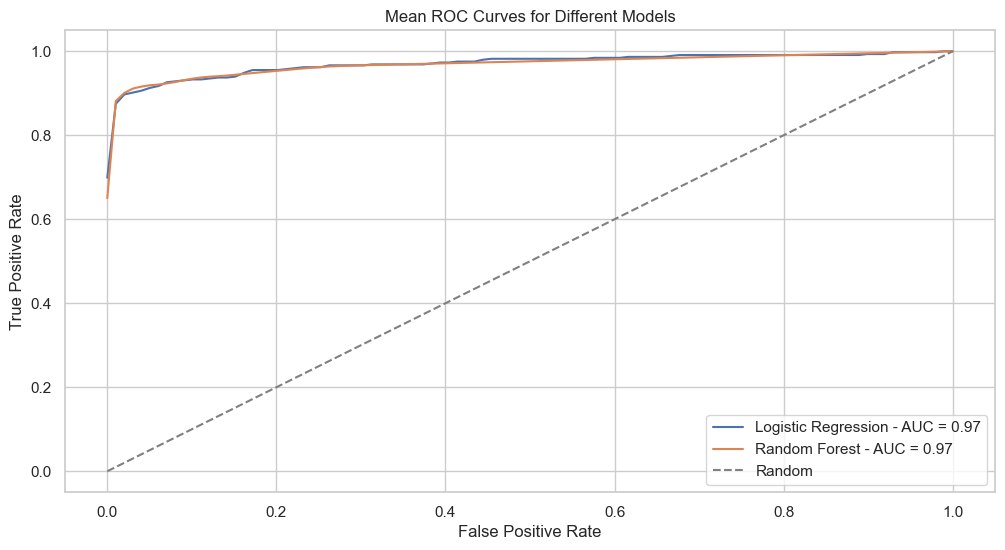

In [115]:
def plot_mean_roc_curve(models, X, y, titles):
    kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=365)

    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(12, 6))

    for model, title in zip(models, titles):
        all_tpr = []

        for train_index, test_index in kfolds.split(X, y):
            x_train, y_train = x[train_index], y[train_index]
            x_test, y_test = x[test_index], y[test_index]

            model.fit(x_train, y_train)
            probabilities = model.predict_proba(x_test)[:, 1]

            fpr, tpr, thresholds = roc_curve(y_test, probabilities)
            interpolated_tpr = np.interp(mean_fpr, fpr, tpr)
            all_tpr.append(interpolated_tpr)

        mean_tpr = np.mean(all_tpr, axis=0)
        mean_auc = auc(mean_fpr, mean_tpr)

        plt.plot(mean_fpr, mean_tpr, label=f'{title} - AUC = {mean_auc:.2f}')

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')

    
    plt.title('Mean ROC Curves for Different Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()


models = [logistic_model, rf_model]

titles = ["Logistic Regression", "Random Forest"]

plot_mean_roc_curve(models, x, y, titles)

from this plot above it can be see that the random forest perform more better then the logistic regression. so i will be using the random forest to completely train my model 

In [119]:
#using gridsearch 

param_grid = {
    'n_estimators': [100, 200],         
    'max_depth': [None, 10, 20],        
    'min_samples_split': [2, 5],        
    'min_samples_leaf': [1, 2]    
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='recall', n_jobs=-1)

grid_search.fit(x, y)

print(f"Best Parameters are: {grid_search.best_params_}")

Best Parameters are: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [122]:
# Predict using the best model
y_pred = grid_search.best_estimator_.predict(x_test)
y_prob = grid_search.best_estimator_.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.99      0.90      0.94        89

    accuracy                           1.00      2089
   macro avg       0.99      0.95      0.97      2089
weighted avg       1.00      1.00      1.00      2089

Confusion Matrix:
 [[1999    1]
 [   9   80]]
ROC-AUC Score: 0.999938202247191


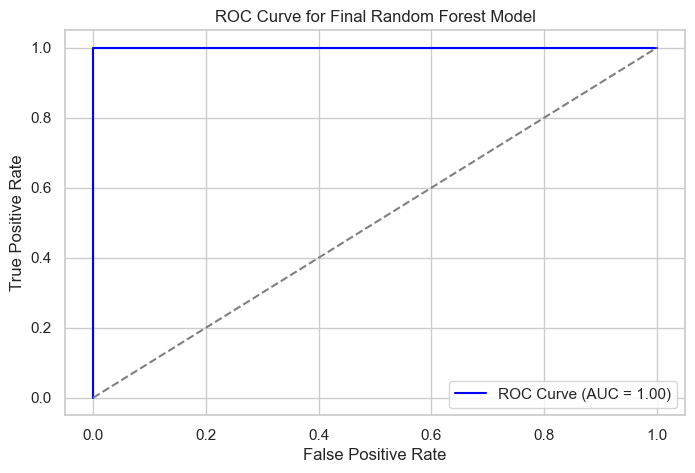

In [123]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Final Random Forest Model")
plt.legend()
plt.show()

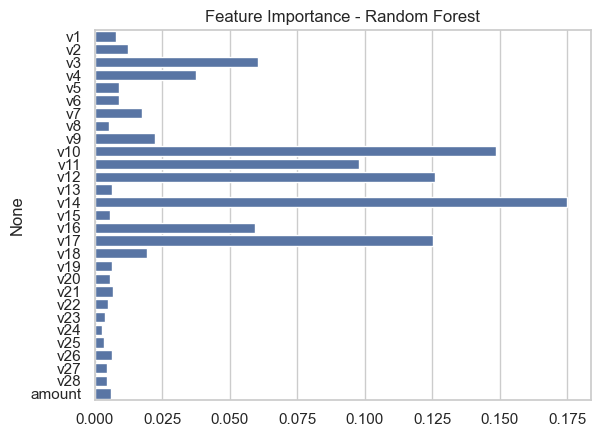

In [126]:
#finding which features matter most in predicting fraud

importances = grid_search.best_estimator_.feature_importances_
feature_names = df.drop('class', axis=1).columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()

In [128]:
#saving the model for depoyment and testing 
import joblib
joblib.dump(grid_search.best_estimator_, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']